A STATISTICAL RESEARCH ON THE EFFECTS OF MENTAL HEALTH ON STUDENTS’ CGPA dataset
This Data set was collected by a survey conducted by Google forms from University student in order to examine their current academic situation and mental health.

All the data was based on Malaysia and collected from Iium (International Icamil University Malaysia).

# 1. Introduction

1. **What is Mental Health?**

Mental health refers to emotions and how you approach situations in life. With good or healthy mental health, you’ll be able to approach challenges, minimize stress, and overcome obstacles. Your mental health will also impact how you socialize and your motivation in relation to your academics.

Mental health problems can affect many areas of students’ lives, reducing their quality of life, academic achievement, physical health, and satisfaction with the college experience, and negatively impacting relationships with friends and family members. These issues can also have long-term consequences for students, affecting their future employment, earning potential, and overall health

2. **Anxiety Vs Depression**

Anxiety and depression are types of mood disorders. Among other things, depression causes feelings of sadness, hopelessness, and reduced energy. Anxiety creates feelings of nervousness, worry, or dread. Although the two conditions are different, you can have both at the same time.

Symptoms of depressions include:

- Anxiety and panic
- Difficulty with schoolwork
- Changes in eating or sleeping patterns
- Emotional outbursts, such as tearfulness, anger or irritability
- Lack of energy or fatigue
- Loss of interest in activities, such as clubs, sports or other social commitments
- Poor self-esteem
- Sense of being overwhelmed
- Thoughts of suicide or self-harm
- Unrealistic guilt

3. **What is Panic Attack?**

A panic attack is a brief episode of intense anxiety, which causes the physical sensations of fear. These can include a racing heartbeat, shortness of breath, dizziness, trembling and muscle tension. Panic attacks occur frequently and unexpectedly and are often not related to any external threat. A panic attack can last from a few minutes to half an hour. However, the physical and emotional effects of the attack may last for a few hours.

Symptoms of a panic attack can include:

- heightened vigilance for danger and physical symptoms
- anxious and irrational thinking
- a strong feeling of dread, danger or foreboding
- fear of going mad, losing control, or dying
- feeling lightheaded and dizzy
- tingling and chills, particularly in the arms and hands
- trembling or shaking, sweating
- hot flushes
- accelerated heart rate
- a feeling of constriction in the chest
- breathing difficulties, including shortness of breath
- nausea or abdominal distress
- tense muscles
- dry mouth
- feelings of unreality and detachment from the environment.

# 2. Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool, cv
from sklearn.naive_bayes import GaussianNB, MultinomialNB

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

2024-08-13 12:23:10.119095: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 12:23:10.119268: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 12:23:10.308387: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv('/kaggle/input/student-mental-health/Student Mental health.csv')
df

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


# 3. Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

 - Age Column has a value missing
 - TimeStamp is not parsed as a DateTime object
 - Course and GPA are object data types


In [4]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [5]:
df.Age.mean()

20.53

So, we can fill this mean value in the Null value

In [6]:
df.Age.fillna('21', inplace=True)

In [7]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

Now we don't have any null values

In [8]:
df.shape

(101, 11)

In [9]:
# Rename columns
df.columns = ['Timestamp','Gender','Age','Course','Current_year','CGPA','Maritial_status','Depression','Anxiety','Panic_Attack','Treatment']
df

,Timestamp,Gender,Age,Course,Current_year,CGPA,Maritial_status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [10]:
# Formatting the Year column
df['Current_year'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

Here, basically Year1 and year 1 are same. So, we basically work with the numbers alone

In [11]:
def clean(Text):
    Text = Text[-1]
    Text = int(Text)
    return Text
df['Current_year'] = df['Current_year'].apply(clean)
df

,Timestamp,Gender,Age,Course,Current_year,CGPA,Maritial_status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No


In [12]:
df['Course'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

here we can see that a lot of courses are interpreted differently

In [13]:
df['Course'].replace({'engin':'Engineering','Engine':'Engineering','Islamic education':'Islamic Education','BIT':'IT','Laws':'Law','Pendidikan islam':'Pendidikan Islam','Kirkhs':'Irkhs','KIRKHS':'Irkhs','psychology':'Psychology','Accounting ':'Accounting','koe':'Koe','KOE':'Koe','Benl':'BENL','Communication ':'Communication','Fiqh fatwa ':'Fiqh','Nursing ':'Nursing'}, inplace=True)
df['Course'].unique()
len(df['Course'].unique())

36

In [14]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

here both '3.50 - 4.00', '3.50 - 4.00 ' are same only. So, to make it as same, we have to remove the extra space here.

In [15]:
def remove_space(string):
    string = string.strip()
    return string
df['CGPA'] = df['CGPA'].apply(remove_space)
df

,Timestamp,Gender,Age,Course,Current_year,CGPA,Maritial_status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic Education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,IT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Law,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No


In [16]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [17]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
df['Maritial_status'].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
df['Maritial_status'].value_counts()

Maritial_status
No     85
Yes    16
Name: count, dtype: int64

In [20]:
df['Age'].value_counts()

Age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
21       1
Name: count, dtype: int64

here basically 21 and 21.0 is same. So, we can convert the Age into float values, so that it won't consider it as a separate values

In [21]:
# Function to clean the Age column
def clean_age(age):
    return float(age)

# Apply the clean_age function to the 'Age' column
df['Age'] = df['Age'].apply(clean_age)

# Check the value counts after cleaning
print(df['Age'].value_counts())

Age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     4
22.0     2
Name: count, dtype: int64


# 4. Data Visualization

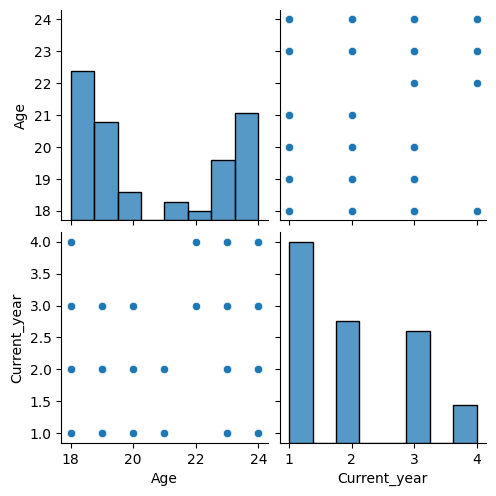

In [22]:
sns.pairplot(df)

In [23]:
df.Gender.value_counts()

Gender
Female    75
Male      26
Name: count, dtype: int64

In [24]:
fig = px.histogram(df, x='Gender',color='Gender')
fig.show()

**The survey is mostly answered by women**

In [25]:
fig = px.histogram(df,x='Age',color='Age')
fig.show()

Here we can see a inverse state of normal distribution here. And the survey is mostly filled out by 18-year-olds

In [26]:
fig = px.histogram(df, x='Current_year',color='Current_year')
fig.show()

As noticed, responses are mostly from first-year students(18-yer-old)

In [27]:
df.Course.value_counts()

Course
Engineering                20
BCS                        18
IT                         11
Koe                         6
Biomedical science          4
Law                         3
BENL                        3
Irkhs                       3
Psychology                  3
Pendidikan Islam            2
Fiqh                        2
Islamic Education           2
Human Sciences              1
Malcom                      1
Kop                         1
Pendidikan Islam            1
Biotechnology               1
Communication               1
Diploma Nursing             1
Econs                       1
Radiography                 1
DIPLOMA TESL                1
MHSC                        1
TAASL                       1
CTS                         1
ALA                         1
Usuluddin                   1
Business Administration     1
Banking Studies             1
Marine science              1
ENM                         1
Accounting                  1
KENMS                       1
Hum

In [28]:
fig = px.histogram(df, x='Course',color='Course')
fig.show()

**Participants are mostly from 4-year Course**

In [29]:
fig = px.histogram(df,x='CGPA',color='CGPA')
fig.show()

repondents are mostly have high CGPA

In [30]:
fig = px.histogram(df,x='Maritial_status',color='Maritial_status')
fig.show()

Most of them are single (we already analyzed most of the people are 18-year respondents)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Current_year'}>]], dtype=object)

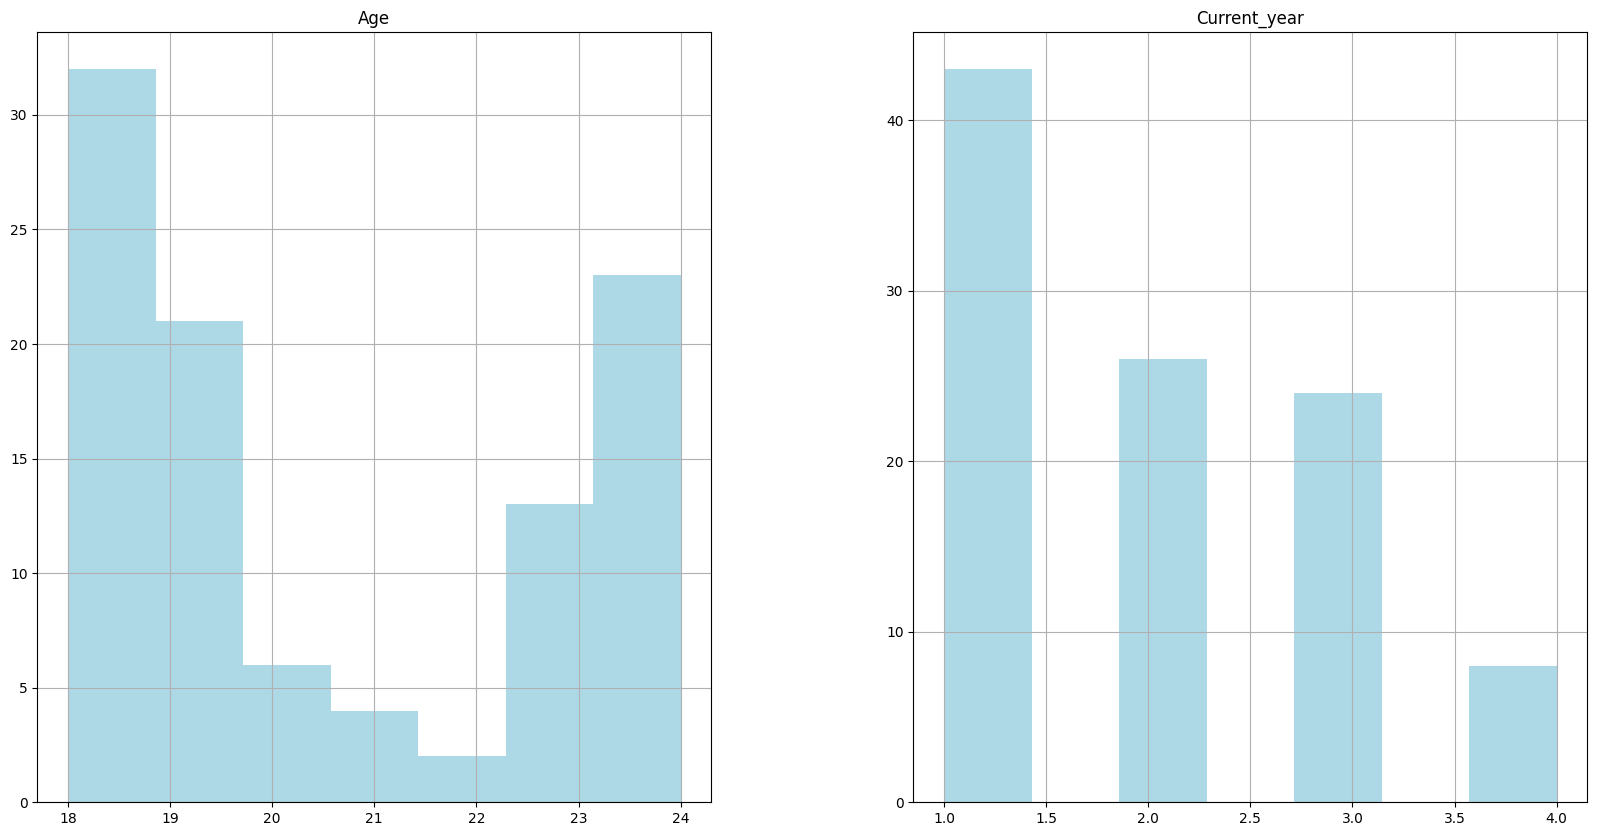

In [31]:
df.hist(figsize=(20,10), bins=7, color='lightblue')

## 4.1 Categorical and Numerical Features

In [32]:
# columns = list(df.columns)

# categoric_columns = []
# numeric_columns = []

categoric_columns= [x for x in df.columns if df.dtypes[x] == 'object']
numeric_columns = [x for x in df.columns if df.dtypes[x] == 'float64']
        
# Assuming the first column is an ID or non-numeric feature
# numeric_columns = numeric_columns[1:]

print('Numerical Features: ', numeric_columns)
print('Categorical Features: ', categoric_columns)

Numerical Features:  ['Age']
Categorical Features:  ['Timestamp', 'Gender', 'Course', 'CGPA', 'Maritial_status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']


## 4.2 Distribution of Categorical Features

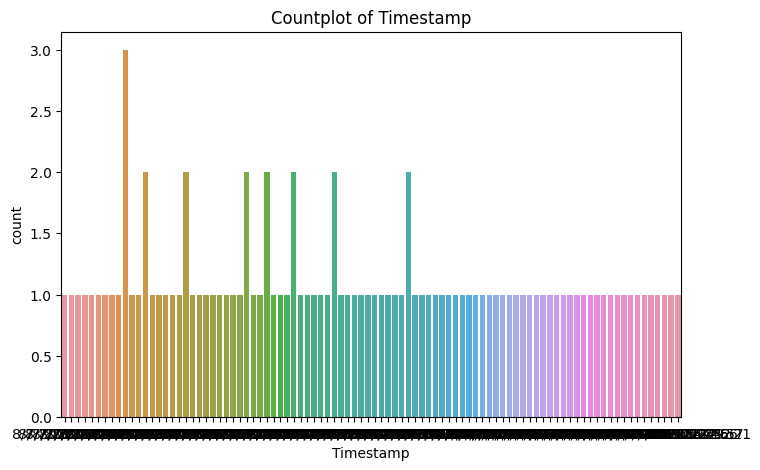

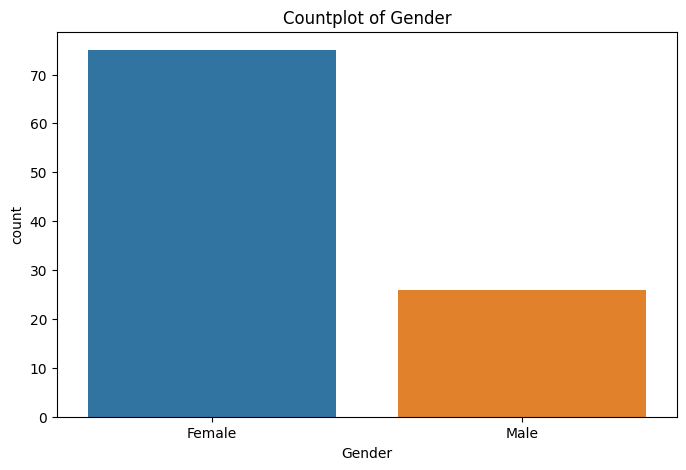

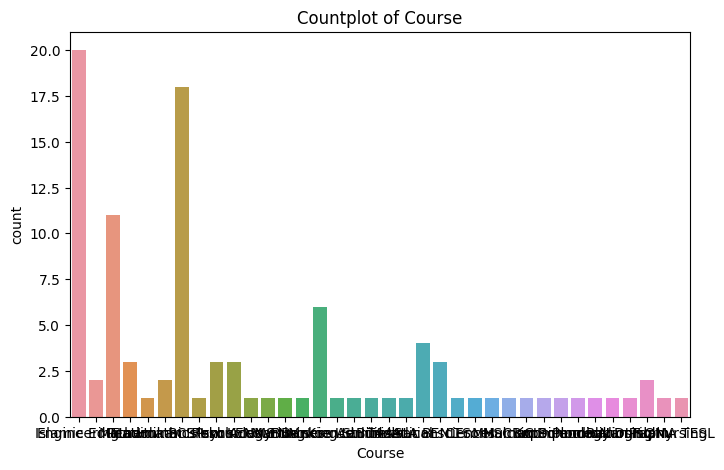

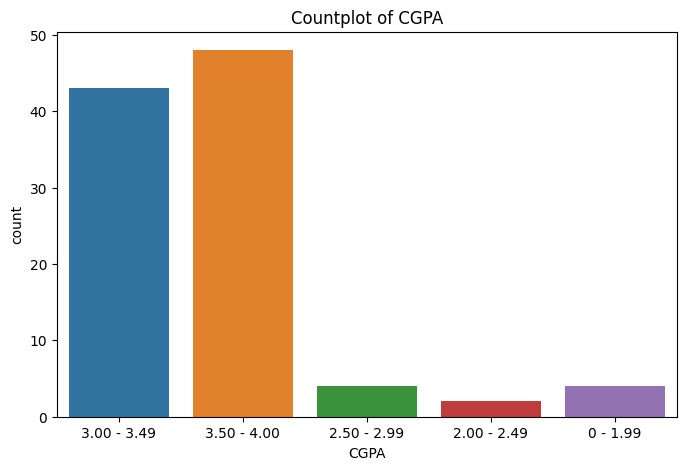

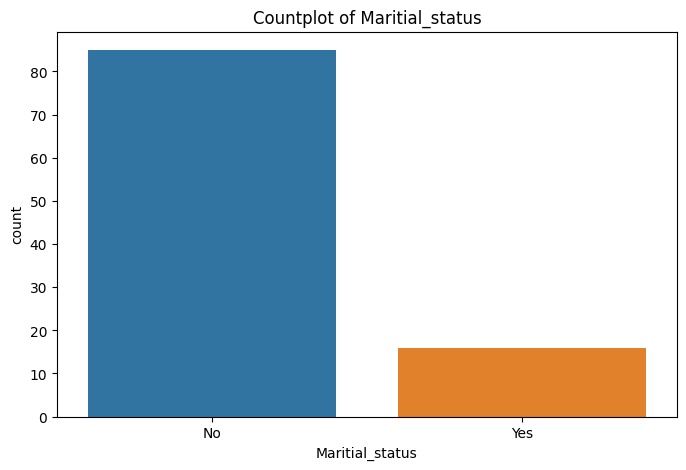

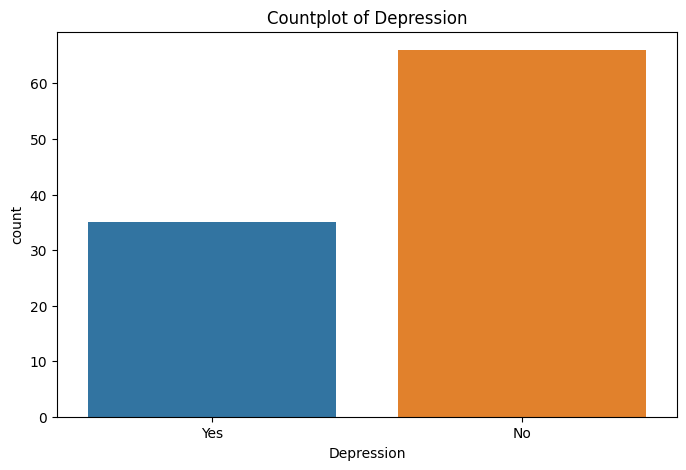

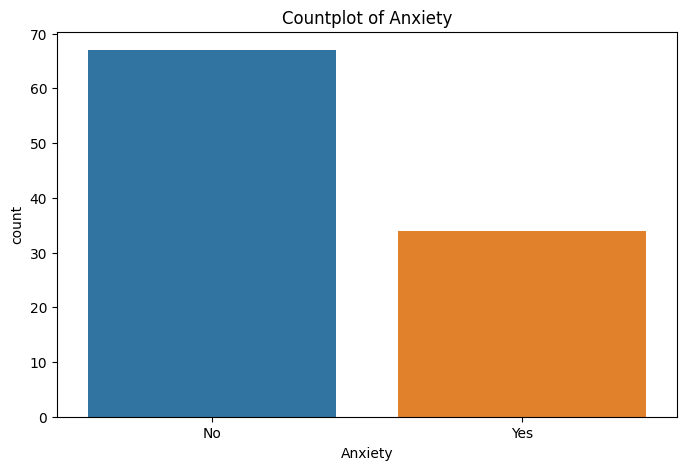

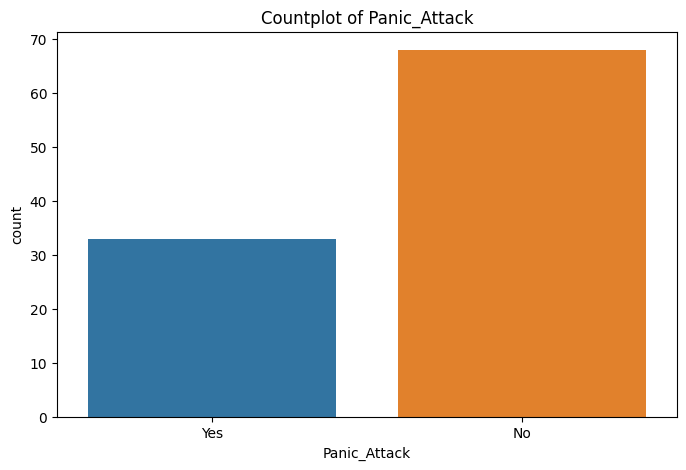

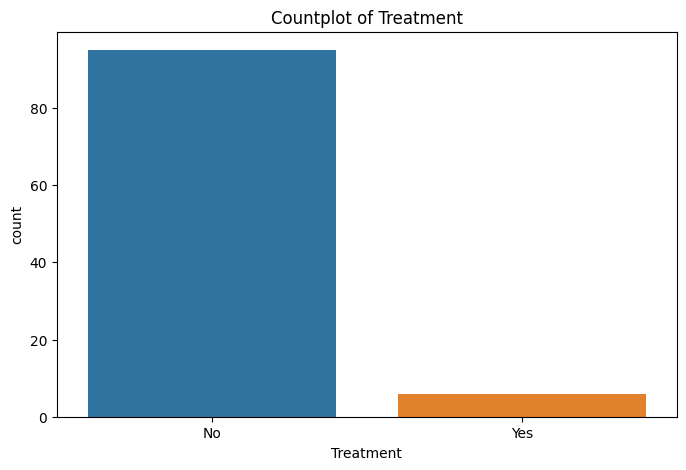

In [33]:
# Plot countplots for each categorical column
for column in categoric_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=column)
    plt.title(f'Countplot of {column}')
#     plt.xticks(rotation=45) #Roatate x labels if they are too long
    plt.show()

- Usually don't have depression
- Usually don't have anxiety
- Usually don't have panic attacks
- Do not receive expert support

## 4.3 Distribution of Numerical Features

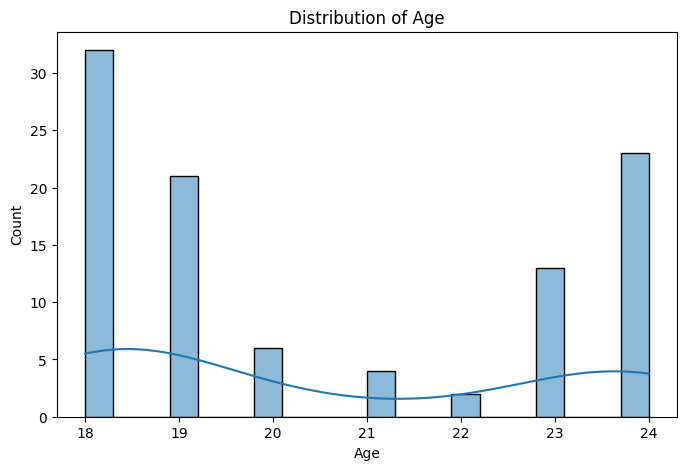

In [34]:
# Plot histogram for each numerical column
for column in numeric_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(data=df, x=column, kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

# 5. Encode Categorical and Numerical Features

In [35]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
df = df.copy()
for column in df[categoric_columns]:
    df[column] = label_encoder.fit_transform(df[column])
    
# Standardize numerical features
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# 6. Exploring Correlations

## 6.1 Heatmap

In [36]:
# df.drop('Timestamp', axis=1, inplace=True)

In [37]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for column in categoric_columns:
    df[column] = encoder.fit_transform(df[column])
df.head()

,Timestamp,Gender,Age,Course,Current_year,CGPA,Maritial_status,Depression,Anxiety,Panic_Attack,Treatment
0,23,0,-1.025395,14,1,3,0,1,0,1,0
1,24,1,0.188256,20,2,3,0,0,1,0,0
2,25,1,-0.620845,18,1,3,0,1,1,1,0
3,26,0,0.592807,24,3,3,1,1,0,0,0
4,27,1,0.997357,28,4,3,0,0,0,0,0


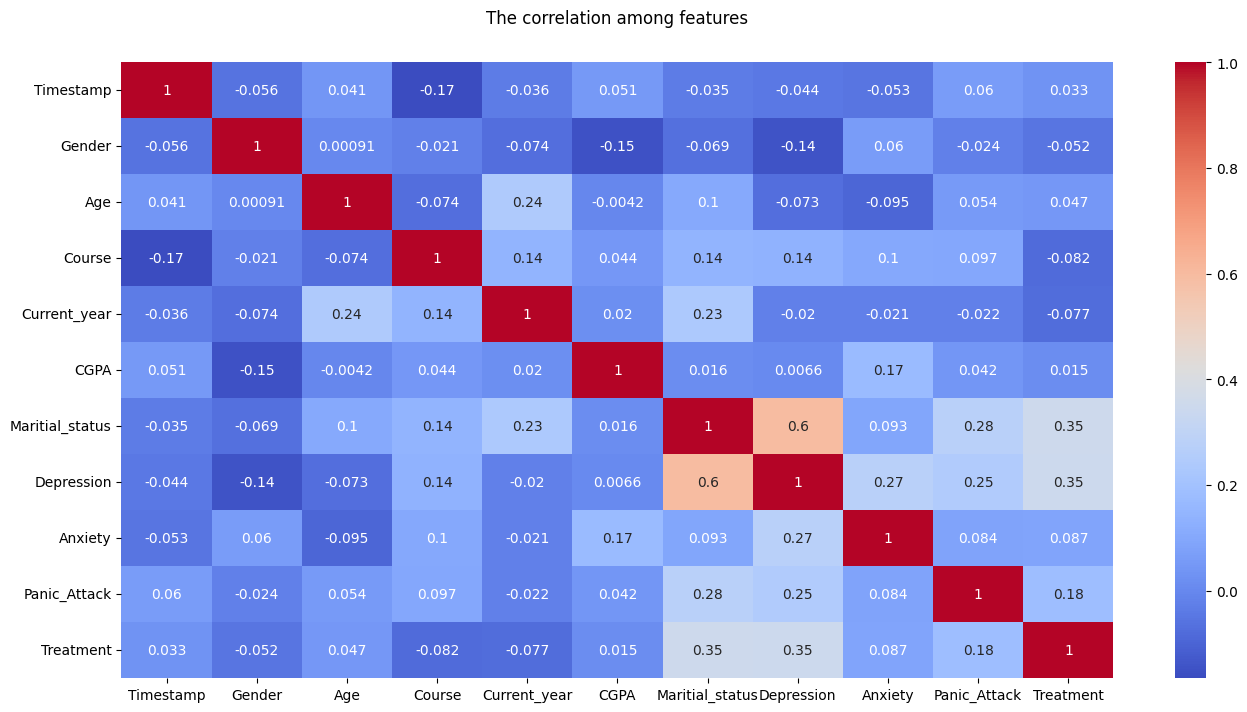

In [38]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('The correlation among features', y=1.05)
plt.show()

- maritial_status showing an assosciation with Depression
- Depression, Anxiety, Panic_attack and Treatment showing a significant correlation
- maritial_status and Treatment showing a significant correlation
- current_year and Age also have a significant correlation

**Find the strongest correlation**

In [39]:
grade_class_corr = df.corr(numeric_only=True)['Depression'].drop('Depression')
strongest_correlation = grade_class_corr.idxmax()
strongest_correlation_value = grade_class_corr.max()

print(f'The strongest correlation with the Depression is {strongest_correlation} with a value of {strongest_correlation_value:.2f}')

The strongest correlation with the Depression is Maritial_status with a value of 0.60


## 6.2 ViolinPlot

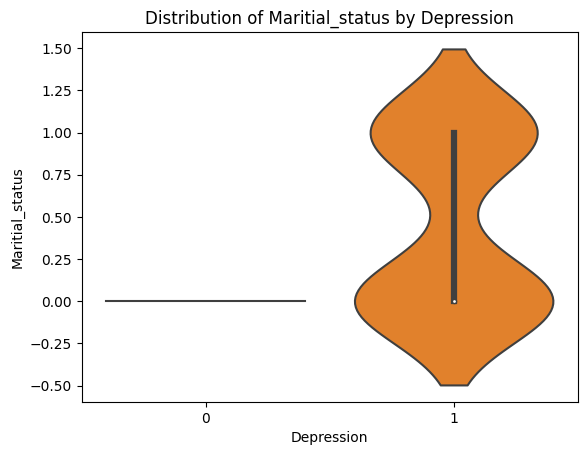

In [40]:
sns.violinplot(data=df, x='Depression', y='Maritial_status')
plt.title(f'Distribution of Maritial_status by Depression')
plt.show()

# 7. Model Selection

In [41]:
X = df.drop(["CGPA"],axis=1)
y = df["CGPA"]

In [42]:
# Splitting the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## 7.1 Feature Importance

In [43]:
clf = RandomForestClassifier(random_state=42)
clf = clf.fit(X,y)

fimp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)

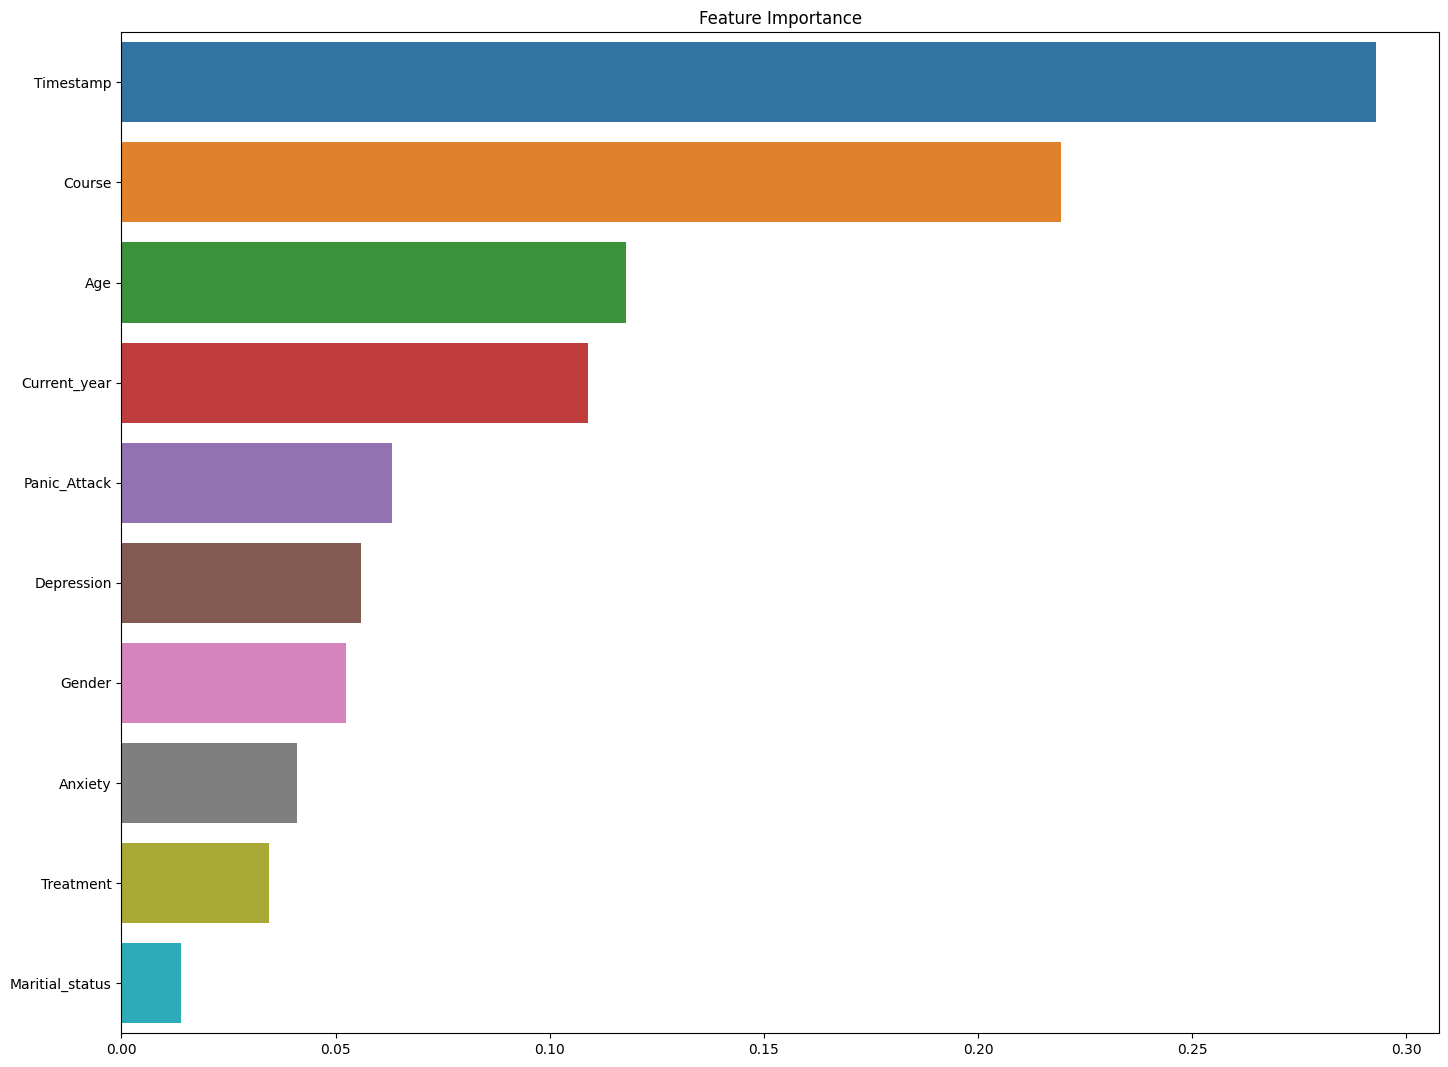

In [44]:
plt.figure(figsize=(17,13))
plt.title("Feature Importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, orient='h')

## 7.2 Classification Models

In [45]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
}

model_names = []
accuracies = []

# Train and Evaluate the model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f'{name} accuracy: {score:.2f}')
    
# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.48
K-Nearest Neighbors accuracy: 0.52
Support Vector Machine accuracy: 0.48
Decision Tree accuracy: 0.43
Random Forest accuracy: 0.52
Gradient Boosting accuracy: 0.43
AdaBoost accuracy: 0.29
Gaussian Naive Bayes accuracy: 0.33
XGBoost accuracy: 0.52
CatBoost accuracy: 0.62


In [46]:
# Find the best model
best_index = accuracies.index(max(accuracies))
best_model_name = model_names[best_index]
best_model = classification_models[best_model_name]

print(f'The best model is: {best_model_name} with an accuracy of {accuracies[best_index]:.2f}')

The best model is: CatBoost with an accuracy of 0.62


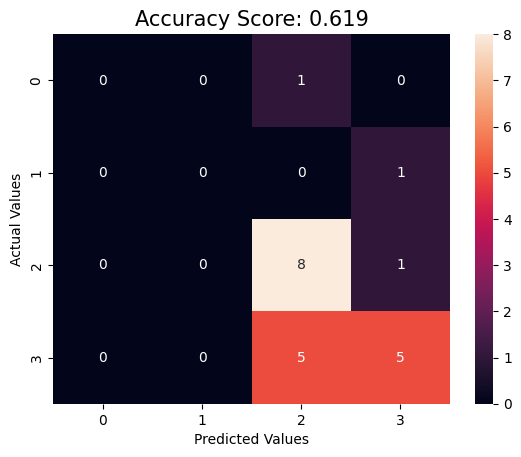

In [47]:
# Initialize and train model
best_model.fit(X_train, y_train)
model_score = best_model.score(X_test, y_test)
y_pred = best_model.predict(X_test)

# Calculate and plot the Confusion matrix
score = round(accuracy_score(y_test, y_pred), 3)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size=15)
plt.show()

# 8. Reducing Dimensionality

In [48]:
fimp.head(9)

Timestamp       0.292964
Course          0.219442
Age             0.117735
Current_year    0.108938
Panic_Attack    0.063199
Depression      0.055954
Gender          0.052405
Anxiety         0.041036
Treatment       0.034366
dtype: float64

Taking > 0.05

In [49]:
X_train = X_train[['Course','Age','Current_year','Panic_Attack','Depression','Gender','Anxiety']]
X_test = X_test[['Course','Age','Current_year','Panic_Attack','Depression','Gender','Anxiety']]

In [50]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(silent=True),
}

model_names = []
accuracies = []

# Train and Evaluate the model
for name, clf in classification_models.items():
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    model_names.append(name)
    accuracies.append(score)
    print(f'{name} accuracy: {score:.2f}')
    
# Create a DataFrame for model accuracies
df_models = pd.DataFrame({'Model': model_names, 'Accuracy': accuracies})

# Plot model accuracies using Plotly
fig = px.bar(df_models, x='Model', y='Accuracy', title='Model Accuracies')
fig.show()

Logistic Regression accuracy: 0.62
K-Nearest Neighbors accuracy: 0.48
Support Vector Machine accuracy: 0.43
Decision Tree accuracy: 0.38
Random Forest accuracy: 0.52
Gradient Boosting accuracy: 0.38
AdaBoost accuracy: 0.43
Gaussian Naive Bayes accuracy: 0.33
XGBoost accuracy: 0.48
CatBoost accuracy: 0.57


Didn't gave that much difference while using the important features, thus all the feature are main contibuting factor for our result.